 # Statistical Analysis of Dakota

## Corpus
[Transcription from Sisseton-Wahpeton Oyate Dakotah Language Institute (SWODLI)](https://docs.google.com/spreadsheets/d/1ixJatzeU1vDluVwttnm04a3swpodSOnoiGVlHz1QTkY/edit#gid=1036955163
### Encoding
Data is UTF-8 encoded. 

## Ngram Analysis
### Building a basic n-gram generator

The following code builds a most basic n-gram generator and shows the result of a naive analysis of the data. 

In [23]:
"""
This program builds a basic n-gram generator and uses it to 
analyze Dakota Data.

Author: Yitong Chen
Last-Updated: 04/30/2018
Reference: https://github.com/Elucidation/Ngram-Tutorial
"""
import random
import re

def generateNgram(words, n=1):
    """Function for generating an n-gram"""
    gram = dict()
    
    # 1-5 grams would make sense given our database
    assert n >= 1 and n <= 5
    
    for i in range(len(words) - (n - 1)):
        key = tuple(words[i:i+n])
        if key in gram:
            gram[key] += 1
        else:
            gram[key] = 1
    gram = sorted(gram.items(), key=lambda x:x[1], reverse=True)
    return gram


def weighted_choice(choices, n = 1):
    total = sum(w for c, w in choices)
    r = random.randint(0, total//n)
    upto = 0
    for c, w in choices:
        if upto + w > r:
            return c
        upto += w

        
def getNGramSentenceRandom(gram, word, n = 50):
    """
    Use n-gram probability data to generate sentences
    """
    word_list = []
    for i in range(n):
        word_list.append(word)
        choices = [element for element in gram if element[0][0] == word]
        if not choices:
            break
        word = weighted_choice(choices, n)[1]
    print(" ".join(word_list))
    
    
def main():
    raw_data = open("dakota_2.csv", "r")
    multiword_entry = 0
    words = []
    for line in raw_data:
        line_split = re.split(r'\s+|[",;?]\s*', line)
        for word in line_split:
            words.append(word)
        # Count multiword entries
        if (len(line_split) > 1):
            multiword_entry += 1
    
    words = list(filter(None, words))
    
    # Pick random start word to generate sentence
    start_word = words[int(len(words) / random.randint(0, 8000))]
    print("Start word: ", start_word, "\n")
    
    for i in range(2, 6):
        print("Generating " + str(i) + "-grams.........")
        print("Most common tuples: ")
        gram = generateNgram(words, i)
        for j in range(10):
            print(gram[j])
        print("Generated sentence:")
        getNGramSentenceRandom(gram, start_word, 10)
        print("-----------------------------------------\n")
    
    # close file when finished
    raw_data.close()

if __name__ == "__main__":
    main()

Start word:  oṡkata 

Generating 2-grams.........
Most common tuples: 
(('bde', 'kte'), 65)
(('kta', 'he'), 63)
(('pum', 'pum'), 59)
(('he', 'tuwe'), 50)
(('he', 'taku'), 43)
(('rum', 'pum'), 37)
(('yaciƞ', 'he'), 32)
(('aƞpetu', 'de'), 28)
(('duha', 'he'), 27)
(('he', 'de'), 27)
Generated sentence:
oṡkata wicasto ipakca tipi heciya bde kte he taku yata
-----------------------------------------

Generating 3-grams.........
Most common tuples: 
(('rum', 'pum', 'pum'), 37)
(('pum', 'pum', 'pum'), 22)
(('de', 'kta', 'he'), 21)
(('pa', 'rum', 'pum'), 16)
(('(pa', 'rum', 'pum'), 15)
(('pum', 'pum', 'pum)'), 15)
(('takoja', 'tataŋka', 'cepa'), 13)
(('tataŋka', 'cepa', 'opta'), 12)
(('cepa', 'opta', 'iyaye.'), 11)
(('opta', 'iyaye.', 'ake'), 11)
Generated sentence:
oṡkata wicasto ipakca tipi yuwaṡtepte uƞkawaciƞpi timahed uṡipi mahed ehnaka
-----------------------------------------

Generating 4-grams.........
Most common tuples: 
(('rum', 'pum', 'pum', 'pum'), 22)
(('pa', 'rum', 'pum', 

### Using the NLTK library
The following code analyzes the same set of data using the NLTK library.

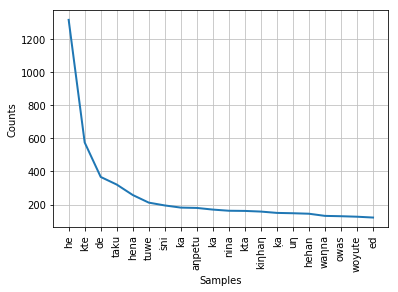

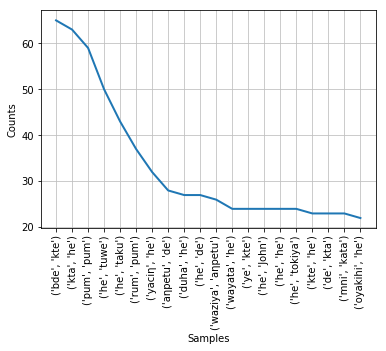

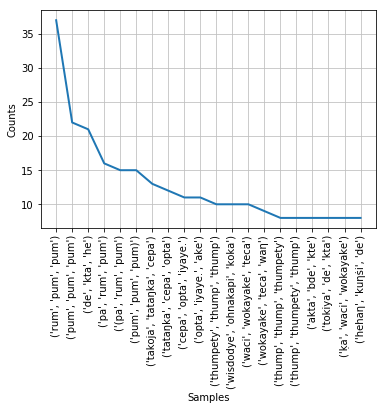

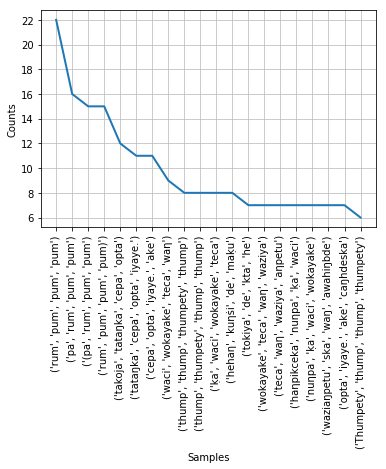

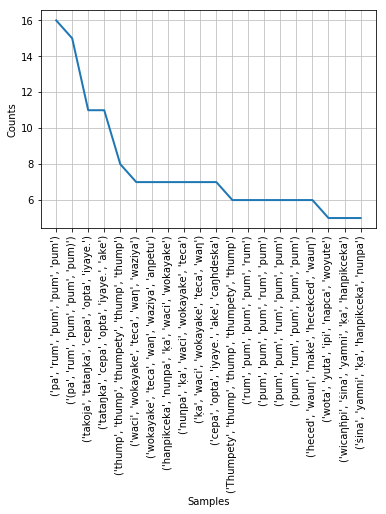

In [12]:
"""
Analyze the Dakota data using the NLTK library

Author: Yitong Chen 
Last Updated: 05/01/2018
"""
from nltk import *
import re


def main():
    raw_data = open("dakota_2.csv", "r")
    multiword_entry = 0
    words = []
    for line in raw_data:
        line_split = re.split(r'\s+|[",;?]\s*', line)
        for word in line_split:
            words.append(word)
        # Count multiword entries
        if (len(line_split) > 1):
            multiword_entry += 1
    
    words = list(filter(None, words))
    
    fwords = FreqDist(words)
#    print(fwords.most_common(20))
    
    fwords.plot(20, cumulative=False)
    
    
    # 2-5 grams
    for i in range(2, 6):
        gram = ngrams(words, i)
        fgram = FreqDist(gram)
#        print(fgram.most_common(20))
        fgram.plot(20, cumulative=False)
    
    raw_data.close()
    
if __name__ == "__main__":
    main()

Most with highest frequency appears to belong to close categories as expected:
* *he* is proposed to be the Question marker. 
* *kte* is proposed to be the Present Tense marker.
* *de* is proposed to be demonstrative.
* *taku* is translated to "something, what"
* *hena* is proposed to be demonstrative.
* *tuwe* is translated to "who".
* *ka* is proposed to be the definite marker.
* *sni* is the negation marker.
* *uŋ* might be the indefinite marker; when used as pronominal clitic, it marks the dual form.

Other highly-frequent words are common verbs such as "eat".

Bigram analysis also demonstrated some common word pairs. However, trigrams, four-grams and five-grams more likely revealed some bias of the corpus rather than some properties of the language.